In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [226]:
df=pd.read_csv("C:\\Users\\mahen\\Downloads\\medical_insurance.csv")

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [228]:
df.shape

(2772, 7)

In [229]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [230]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [231]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Univariate Analysis

c:\Users\mahen\anaconda_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


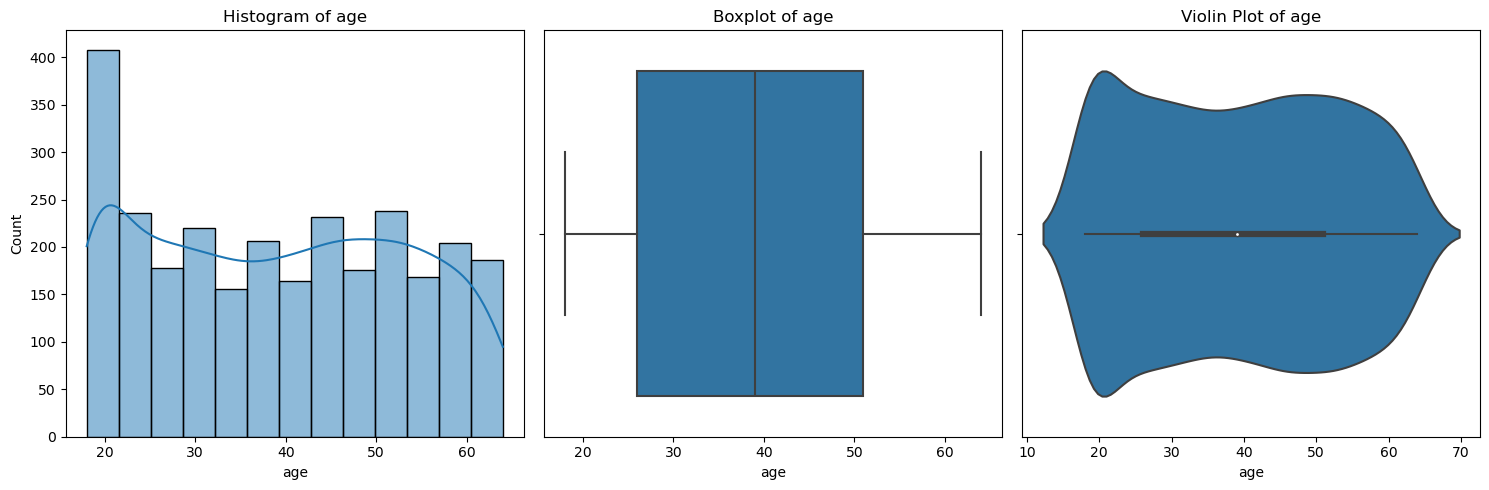

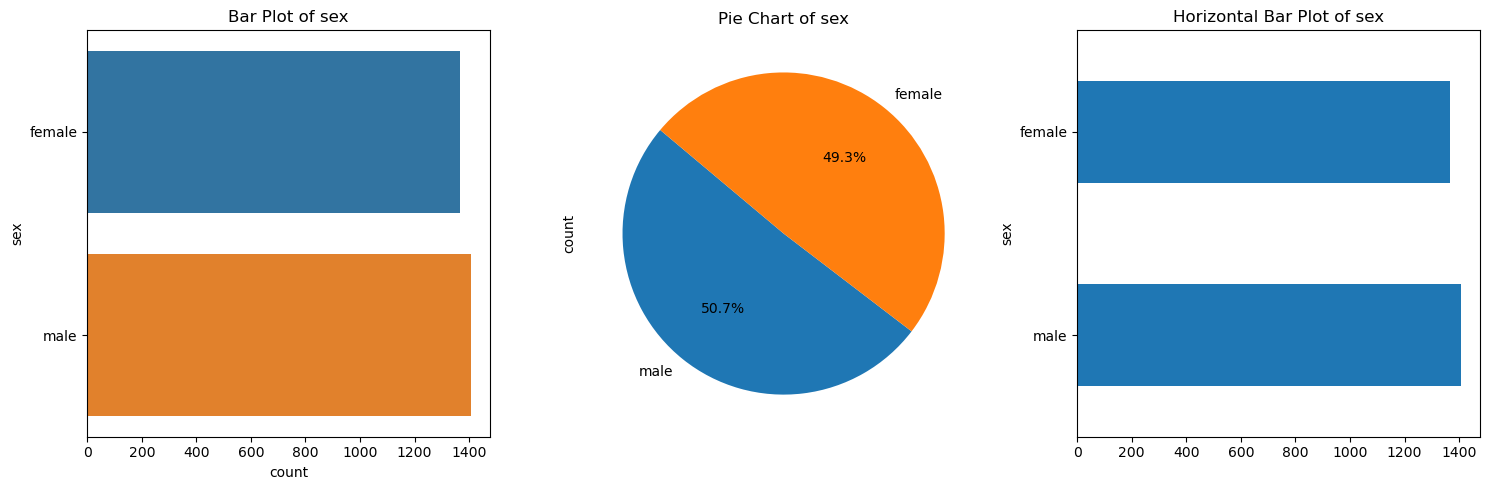

c:\Users\mahen\anaconda_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


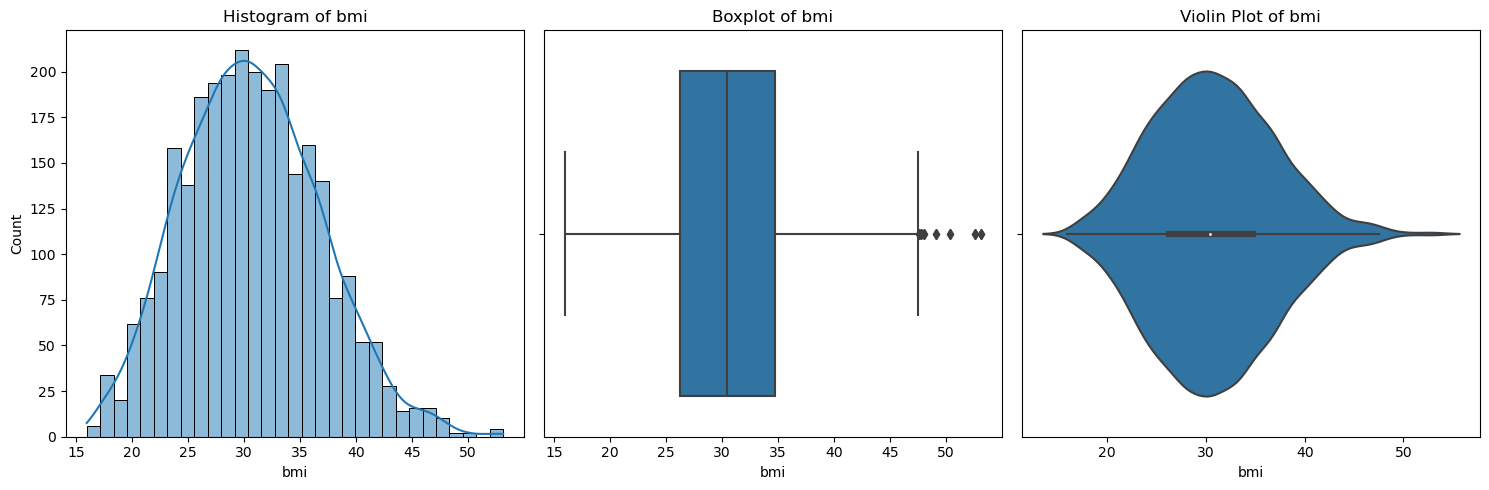

c:\Users\mahen\anaconda_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


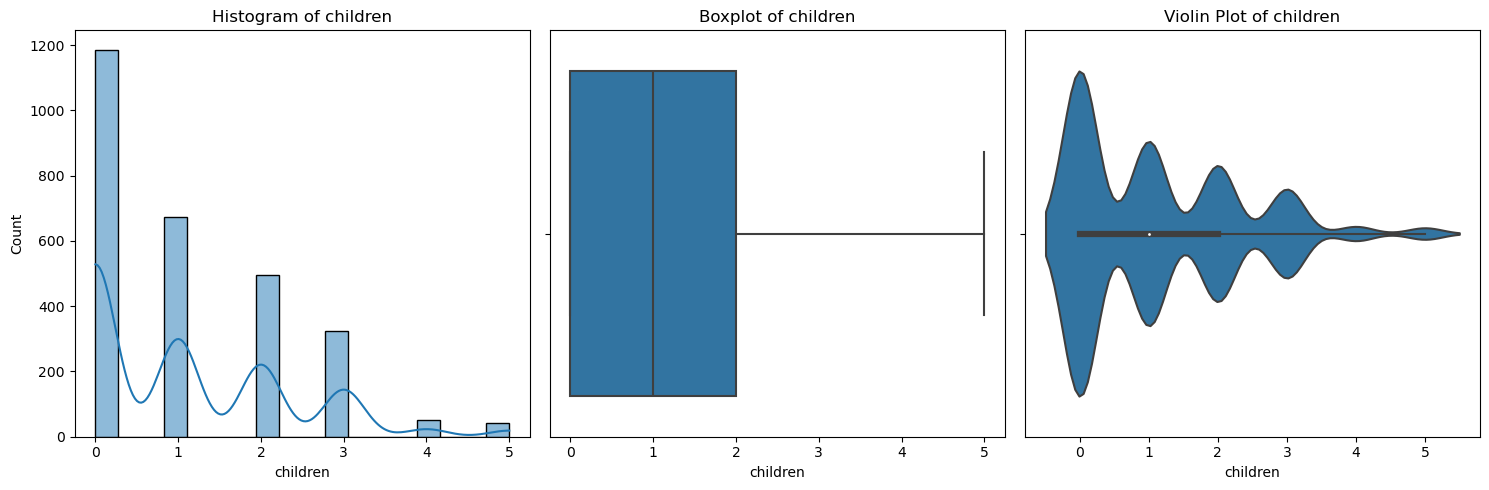

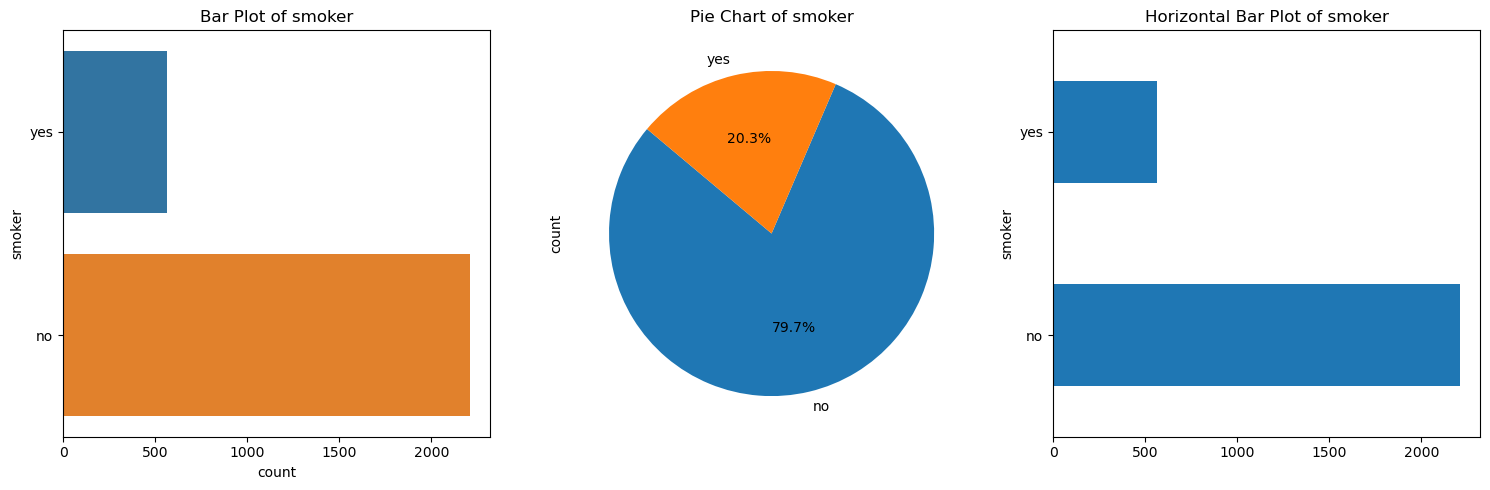

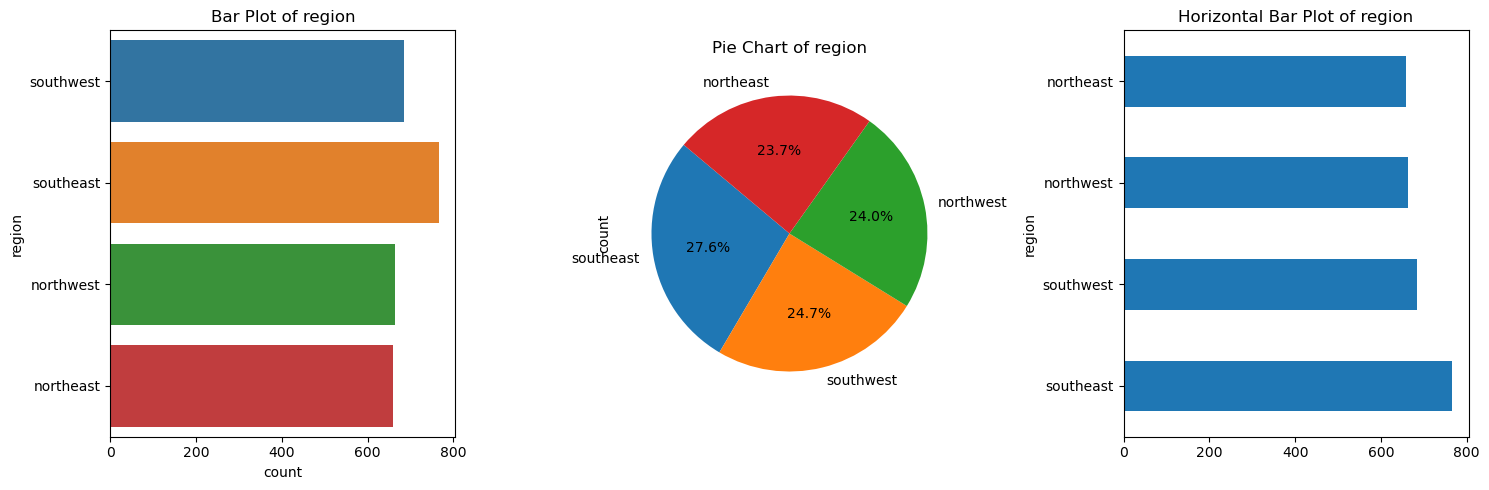

c:\Users\mahen\anaconda_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


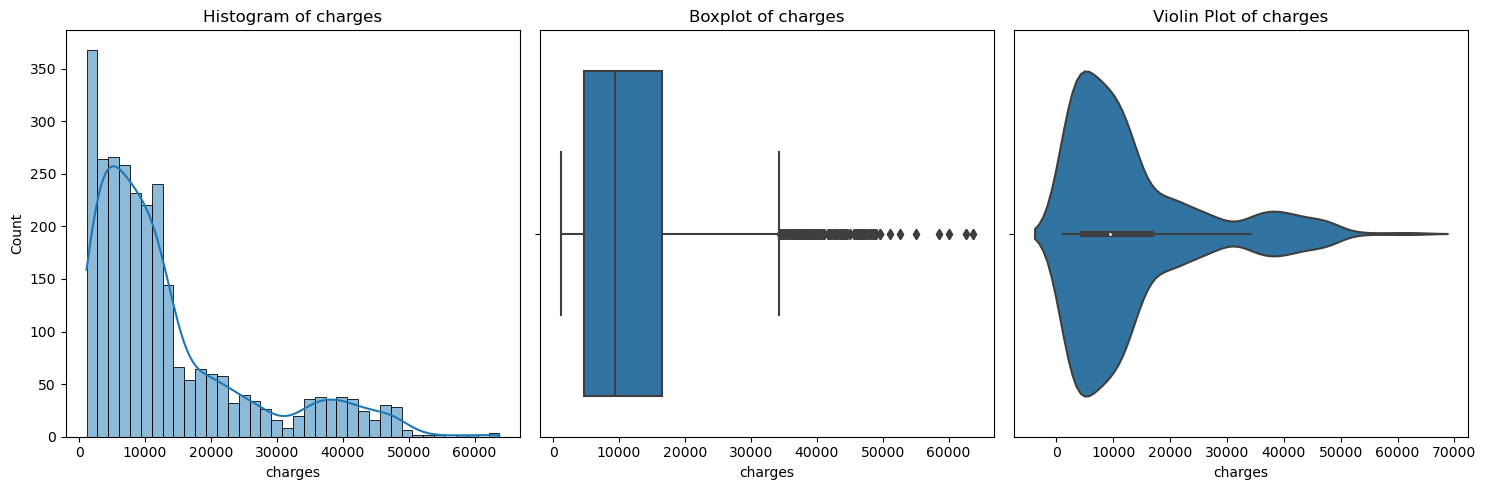

In [232]:
# Loop over columns and perform univariate analysis
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Integer/Float Data
        plt.figure(figsize=(15, 5))
        
        # Plot 1: Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        
        # Plot 2: Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        
        # Plot 3: Violin Plot
        plt.subplot(1, 3, 3)
        sns.violinplot(x=df[column])
        plt.title(f'Violin Plot of {column}')
        
        plt.tight_layout()
        plt.show()
        
    elif df[column].dtype == 'object':
        # Object Data
        plt.figure(figsize=(15, 5))
        
        # Plot 1: Bar Plot
        plt.subplot(1, 3, 1)
        sns.countplot(y=df[column])
        plt.title(f'Bar Plot of {column}')
        
        # Plot 2: Pie Chart
        plt.subplot(1, 3, 2)
        df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart of {column}')
        
        # Plot 3: Horizontal Bar Plot (alternative way to represent categorical distribution)
        plt.subplot(1, 3, 3)
        df[column].value_counts().plot.barh()
        plt.title(f'Horizontal Bar Plot of {column}')
        
        plt.tight_layout()
        plt.show()

### Bivariate Analysis

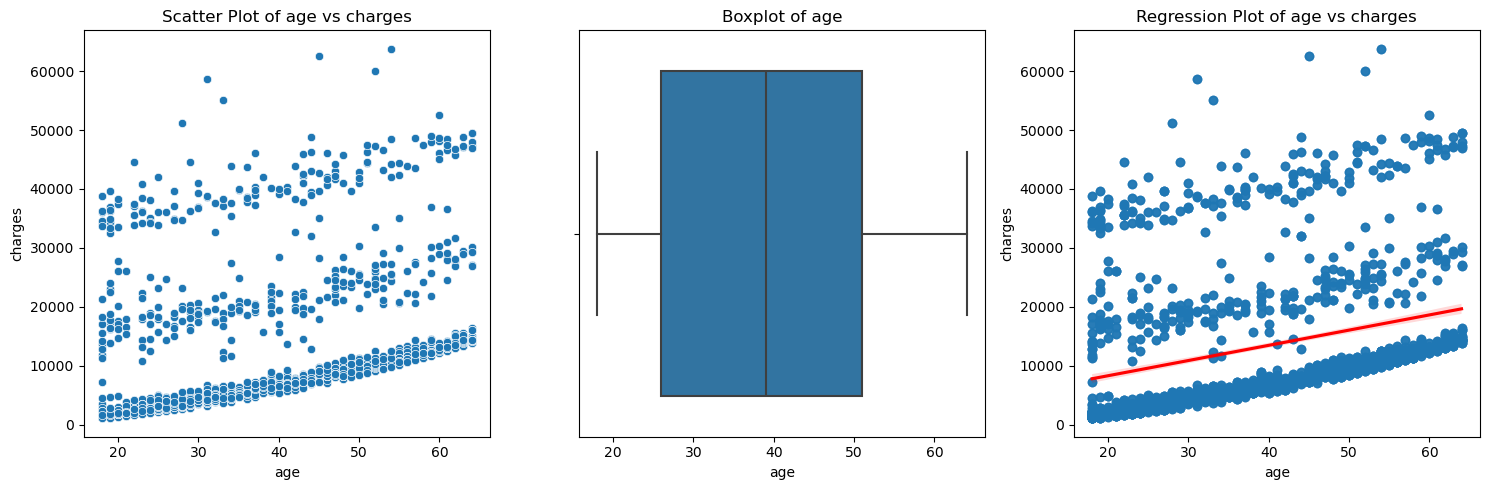

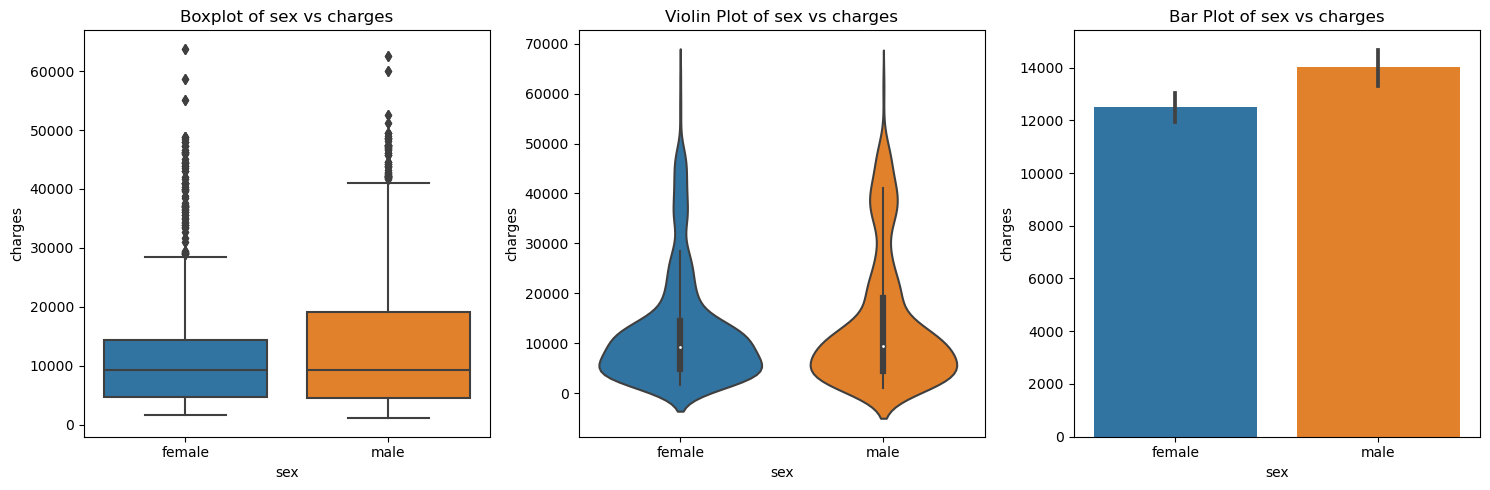

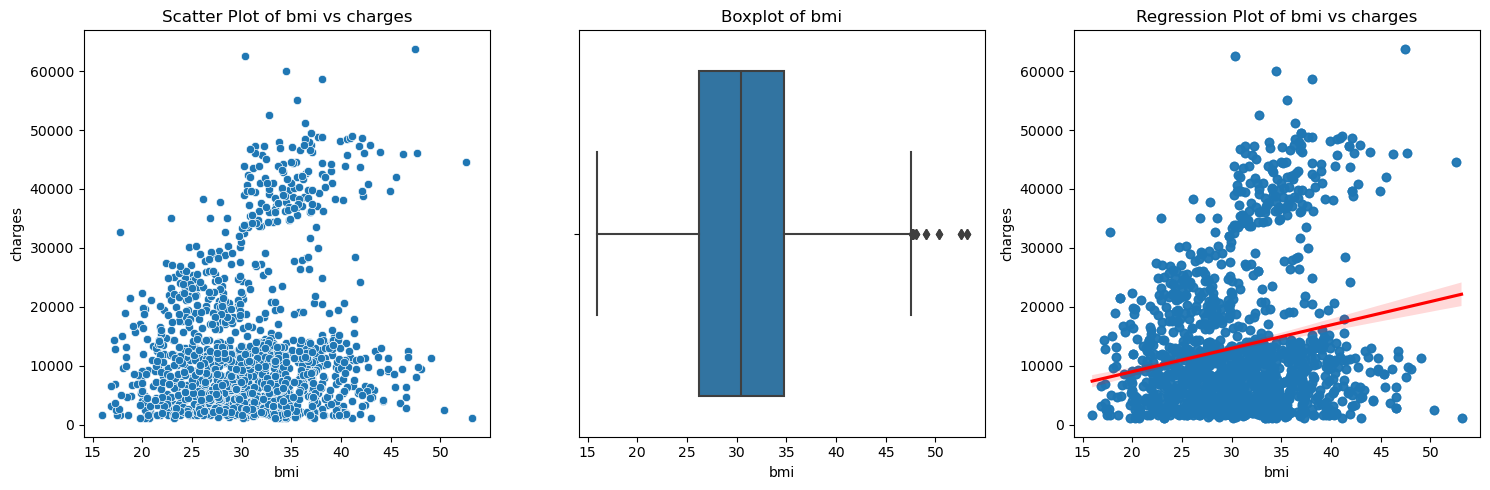

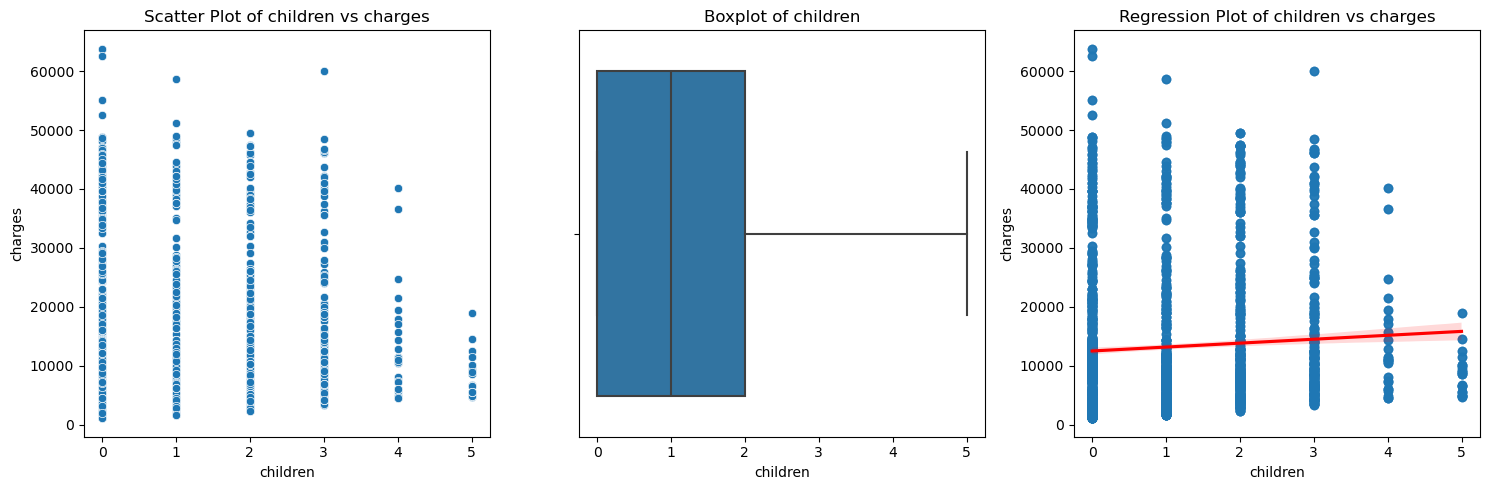

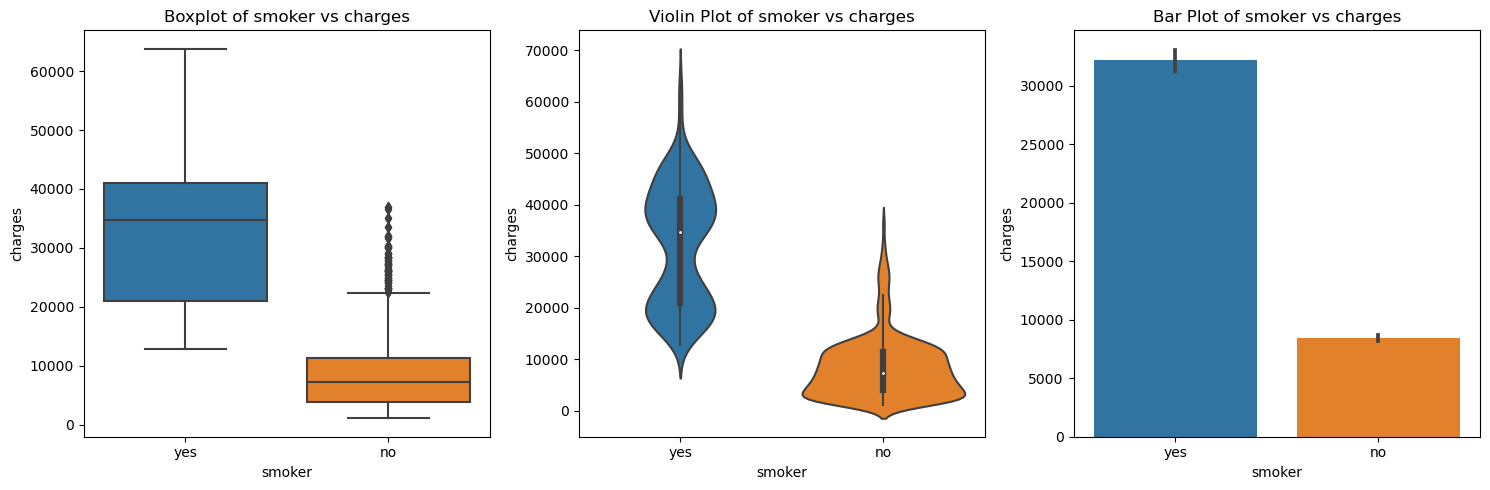

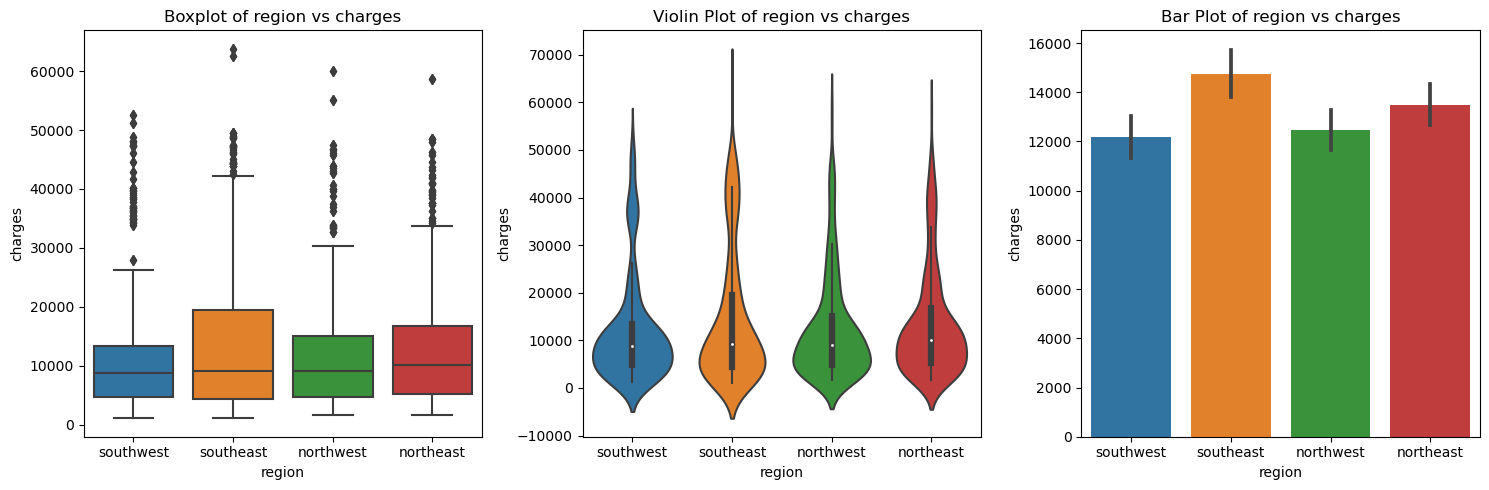

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Loop over columns and perform bivariate analysis with respect to 'charges'
target = 'charges'

for column in df.columns:
    if column == target:
        continue

    plt.figure(figsize=(15, 5))
    
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Numerical Data
        # Plot 1: Scatter Plot
        plt.subplot(1, 3, 1)
        sns.scatterplot(x=df[column], y=df[target])
        plt.title(f'Scatter Plot of {column} vs {target}')
        
        # Plot 2: Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        
        # Plot 3: Regression Plot
        plt.subplot(1, 3, 3)
        sns.regplot(x=df[column], y=df[target], line_kws={"color": "red"})
        plt.title(f'Regression Plot of {column} vs {target}')
        
    elif df[column].dtype == 'object':
        # Categorical Data
        # Plot 1: Boxplot
        plt.subplot(1, 3, 1)
        sns.boxplot(x=df[column], y=df[target])
        plt.title(f'Boxplot of {column} vs {target}')
        
        # Plot 2: Violin Plot
        plt.subplot(1, 3, 2)
        sns.violinplot(x=df[column], y=df[target])
        plt.title(f'Violin Plot of {column} vs {target}')
        
        # Plot 3: Bar Plot
        plt.subplot(1, 3, 3)
        sns.barplot(x=df[column], y=df[target])
        plt.title(f'Bar Plot of {column} vs {target}')
    
    plt.tight_layout()
    plt.show()


In [234]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int32','int64', 'float64'])

# Calculate correlation with the 'charges' column
correlation_with_charges = numerical_cols.corr()['charges'].sort_values(ascending=False)

print(correlation_with_charges)


charges     1.000000
age         0.298624
bmi         0.199846
children    0.066442
Name: charges, dtype: float64


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### Feature engineering

In [236]:
import pandas as pd

# Assuming 'features' is your DataFrame with the columns provided
# Select numerical columns only
numerical_cols = ['age', 'bmi', 'children', 'charges']
numerical_features = df[numerical_cols]

# Calculate quartiles and IQR
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers = ((numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))).sum()

# Calculate total number of entries in the dataset
total_entries = len(df)

# Calculate percentage of outliers correctly
percentage_outliers = (outliers / total_entries) * 100

# Print the results
print("Number of outliers:\n", outliers)
print("\nPercentage of outliers:\n", percentage_outliers)


Number of outliers:
 age           0
bmi          14
children      0
charges     296
dtype: int64

Percentage of outliers:
 age          0.000000
bmi          0.505051
children     0.000000
charges     10.678211
dtype: float64


- When i drop the outliers of charges  model is not performing well thats'y iam not going to remove those 10% of columns

### Binning Age into Categories: 
- pd.cut creates a categorical column with age bins.
- This helps the model to learn different patterns for different age groups.

- Reason = i have seen that if the age is increasing medical charges prices are slightly increase in univariate analysis

In [237]:
# Define age bins
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '21-40', '41-60', '61-80']

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(df[['age', 'age_group']].head())

   age age_group
0   19      0-20
1   18      0-20
2   28     21-40
3   33     21-40
4   32     21-40


C:\Users\mahen\AppData\Local\Temp\ipykernel_27600\4104845062.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='charges', data=df, estimator=np.mean, ci=None)
c:\Users\mahen\anaconda_new\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


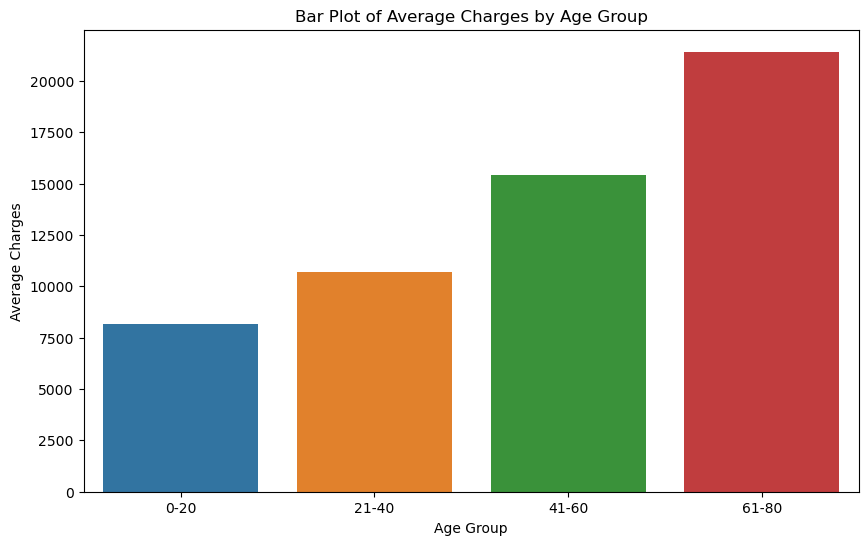

In [238]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='charges', data=df, estimator=np.mean, ci=None)
plt.title('Bar Plot of Average Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.show()


- As we can clearly observer that as the age is increasing the Price of the medical insurance is getting increase 

- Note further we need to makesure to do label encoding to the age_group because it has age group order matters for predicting the charges 

c:\Users\mahen\anaconda_new\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\mahen\anaconda_new\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


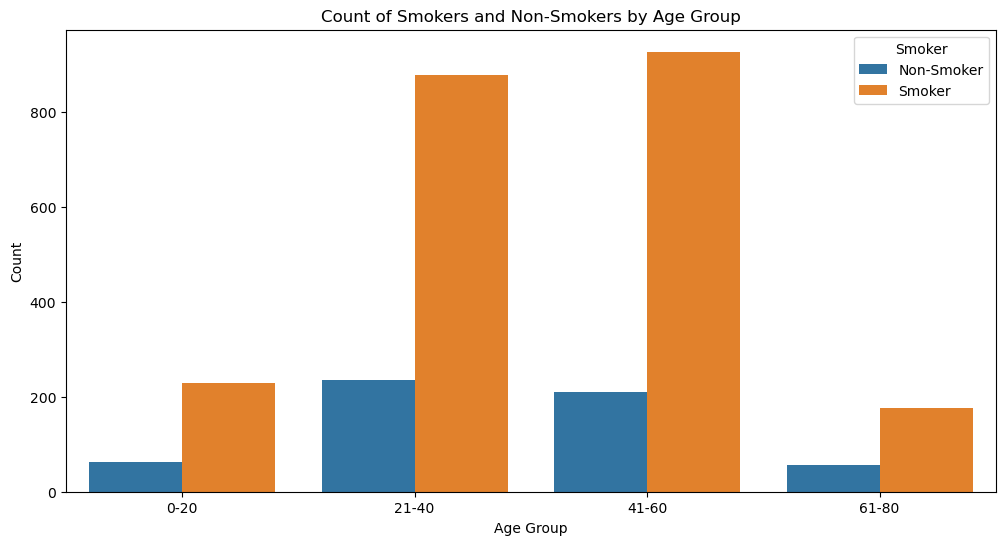

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with age_group and smoker columns

plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='smoker', data=df)
plt.title('Count of Smokers and Non-Smokers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()


In [240]:
# Create a binary column for smoker
df['smoker_binary'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [241]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,smoker_binary
0,19,female,27.900,0,yes,southwest,16884.92400,0-20,1
1,18,male,33.770,1,no,southeast,1725.55230,0-20,0
2,28,male,33.000,3,no,southeast,4449.46200,21-40,0
3,33,male,22.705,0,no,northwest,21984.47061,21-40,0
4,32,male,28.880,0,no,northwest,3866.85520,21-40,0


### Calculate mean charges for each combination of age_group and smoker

In [242]:
# Calculate mean charges for each combination of age_group and smoker
mean_charges_by_age_group_smoker = df.groupby(['age_group', 'smoker'])['charges'].mean().to_dict()

# Create a new column 'mean_charges_by_age_smoker' based on the aggregated values
df['mean_charges_by_age_group_smoker'] = df.apply(lambda row: mean_charges_by_age_group_smoker[(row['age_group'], row['smoker'])], axis=1)

C:\Users\mahen\AppData\Local\Temp\ipykernel_27600\3751248315.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_charges_by_age_group_smoker = df.groupby(['age_group', 'smoker'])['charges'].mean().to_dict()


In [243]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,smoker_binary,mean_charges_by_age_group_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0-20,1,26069.607974
1,18,male,33.770,1,no,southeast,1725.55230,0-20,0,3269.802676
2,28,male,33.000,3,no,southeast,4449.46200,21-40,0,5634.616863
3,33,male,22.705,0,no,northwest,21984.47061,21-40,0,5634.616863
4,32,male,28.880,0,no,northwest,3866.85520,21-40,0,5634.616863


C:\Users\mahen\AppData\Local\Temp\ipykernel_27600\185765852.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='charges', hue='smoker', data=df, estimator=np.mean, ci=None)
c:\Users\mahen\anaconda_new\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\mahen\anaconda_new\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


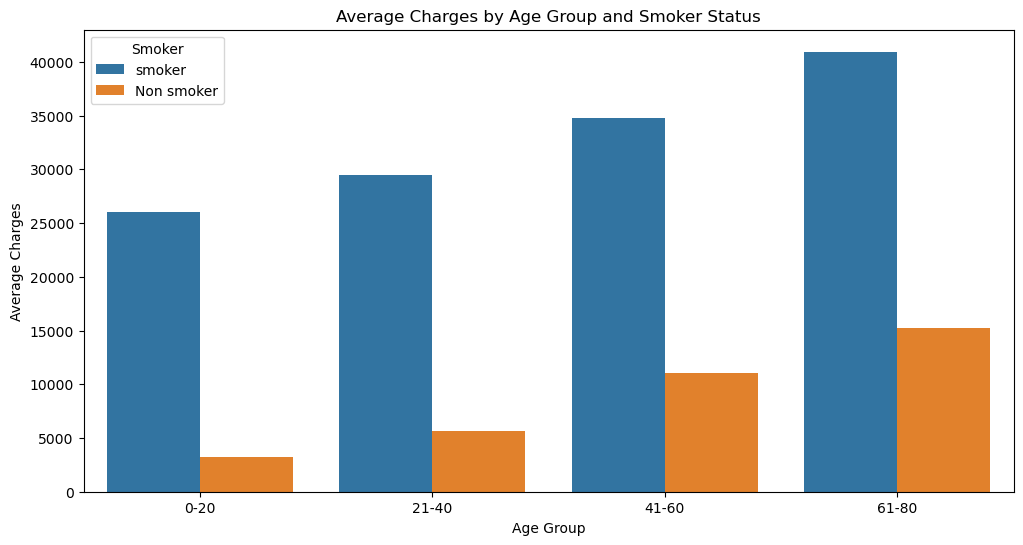

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the mean charges for each age_group and smoker combination
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='charges', hue='smoker', data=df, estimator=np.mean, ci=None)
plt.title('Average Charges by Age Group and Smoker Status')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.legend(title='Smoker', labels=['smoker', 'Non smoker'])
plt.show()


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   age                               2772 non-null   int64   
 1   sex                               2772 non-null   object  
 2   bmi                               2772 non-null   float64 
 3   children                          2772 non-null   int64   
 4   smoker                            2772 non-null   object  
 5   region                            2772 non-null   object  
 6   charges                           2772 non-null   float64 
 7   age_group                         2772 non-null   category
 8   smoker_binary                     2772 non-null   int64   
 9   mean_charges_by_age_group_smoker  2772 non-null   float64 
dtypes: category(1), float64(3), int64(3), object(3)
memory usage: 197.9+ KB


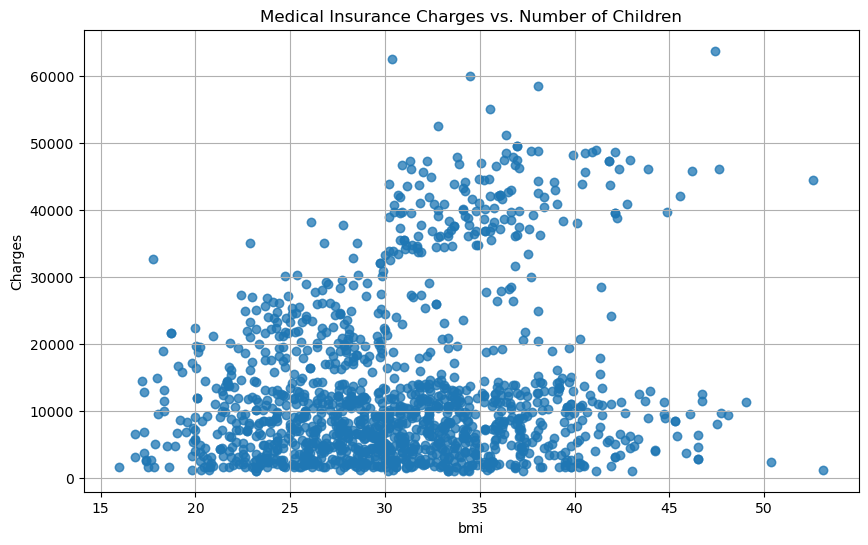

In [219]:
import matplotlib.pyplot as plt

# Scatter plot between charges and children
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.title('Medical Insurance Charges vs. Number of Children')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   age                               2772 non-null   int64   
 1   sex                               2772 non-null   object  
 2   bmi                               2772 non-null   float64 
 3   children                          2772 non-null   int64   
 4   smoker                            2772 non-null   object  
 5   region                            2772 non-null   object  
 6   charges                           2772 non-null   float64 
 7   age_group                         2772 non-null   category
 8   smoker_binary                     2772 non-null   int64   
 9   mean_charges_by_age_group_smoker  2772 non-null   float64 
dtypes: category(1), float64(3), int64(3), object(3)
memory usage: 197.9+ KB


In [245]:
# Define the mapping
sex_mapping = {'female': 0, 'male': 1}

# Apply the mapping using map function
df['sex'] = df['sex'].map(sex_mapping)

# Convert 'sex' column to int
df['sex'] = df['sex'].astype(int)


In [246]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,smoker_binary,mean_charges_by_age_group_smoker
0,19,0,27.900,0,yes,southwest,16884.92400,0-20,1,26069.607974
1,18,1,33.770,1,no,southeast,1725.55230,0-20,0,3269.802676
2,28,1,33.000,3,no,southeast,4449.46200,21-40,0,5634.616863
3,33,1,22.705,0,no,northwest,21984.47061,21-40,0,5634.616863
4,32,1,28.880,0,no,northwest,3866.85520,21-40,0,5634.616863


In [247]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int32','int64', 'float64'])

# Calculate correlation with the 'charges' column
correlation_with_charges = numerical_cols.corr()['charges'].sort_values(ascending=False)

print(correlation_with_charges)


charges                             1.000000
mean_charges_by_age_group_smoker    0.844227
smoker_binary                       0.788783
age                                 0.298624
bmi                                 0.199846
children                            0.066442
sex                                 0.062837
Name: charges, dtype: float64


In [248]:
# Columns to drop
columns_to_drop = [ 'sex', 'children','smoker','age_group','region']

# Drop columns from df
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df.head())  # Use .head() to show the first few rows of the DataFrame


   age     bmi      charges  smoker_binary  mean_charges_by_age_group_smoker
0   19  27.900  16884.92400              1                      26069.607974
1   18  33.770   1725.55230              0                       3269.802676
2   28  33.000   4449.46200              0                       5634.616863
3   33  22.705  21984.47061              0                       5634.616863
4   32  28.880   3866.85520              0                       5634.616863


In [252]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int32','int64', 'float64'])

# Calculate correlation with the 'charges' column
correlation_with_charges = numerical_cols.corr()['charges'].sort_values(ascending=False)

print(correlation_with_charges)


charges                             1.000000
mean_charges_by_age_group_smoker    0.844227
smoker_binary                       0.788783
age                                 0.298624
bmi                                 0.199846
Name: charges, dtype: float64


### train_test split

Fitting 5 folds for each of 3 candidates, totalling 15 fits


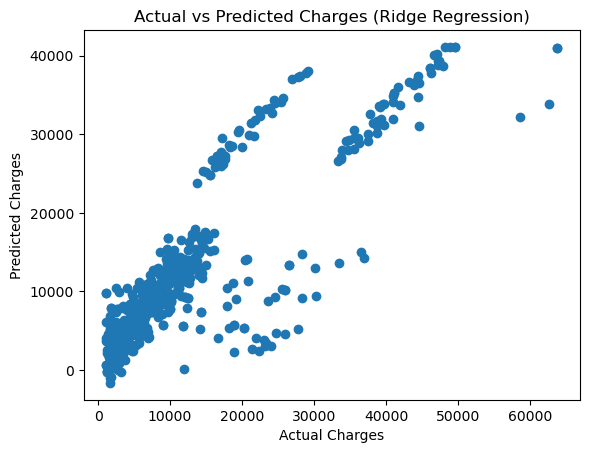

Fitting 5 folds for each of 3 candidates, totalling 15 fits


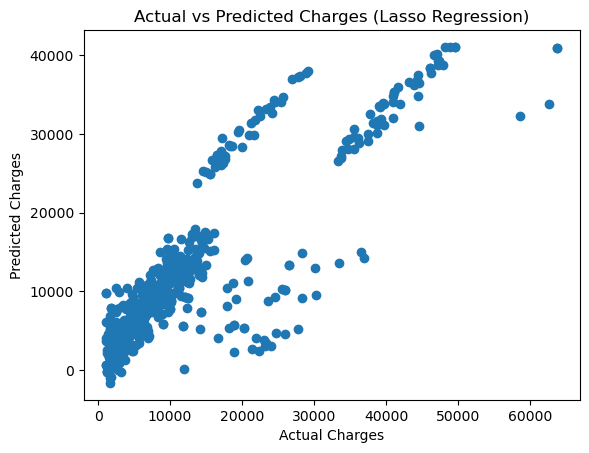

Fitting 5 folds for each of 9 candidates, totalling 45 fits


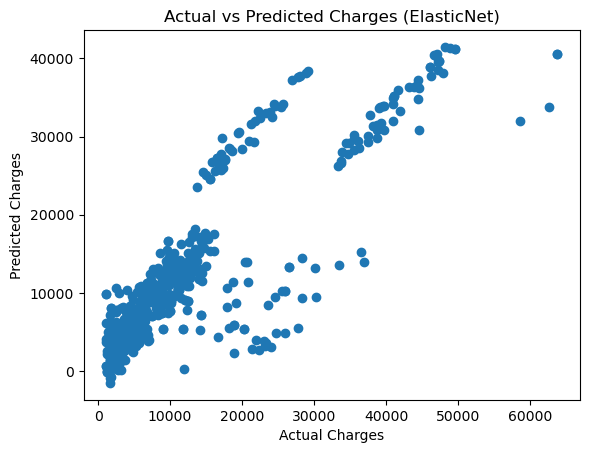

Fitting 5 folds for each of 81 candidates, totalling 405 fits


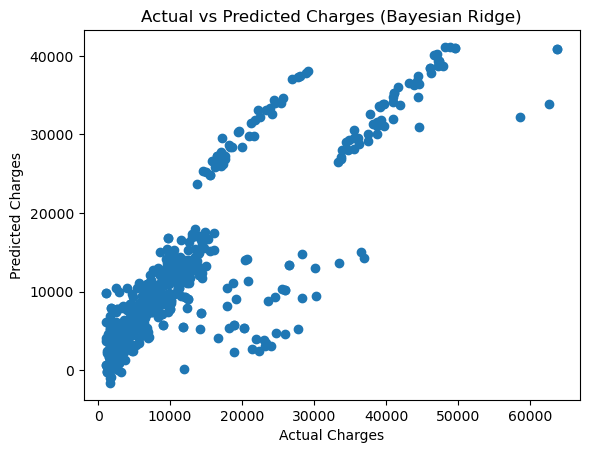

Fitting 5 folds for each of 3 candidates, totalling 15 fits


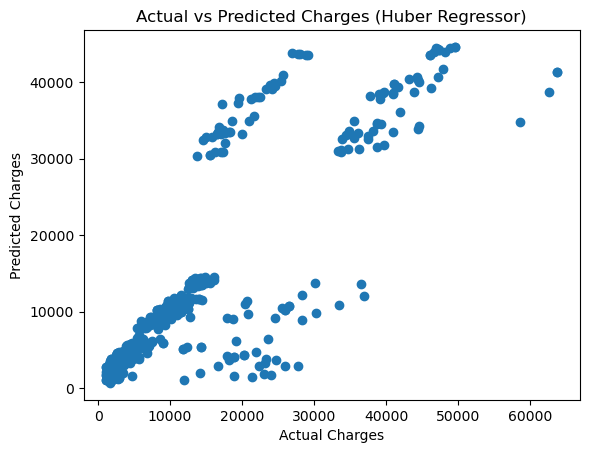

Fitting 5 folds for each of 4 candidates, totalling 20 fits


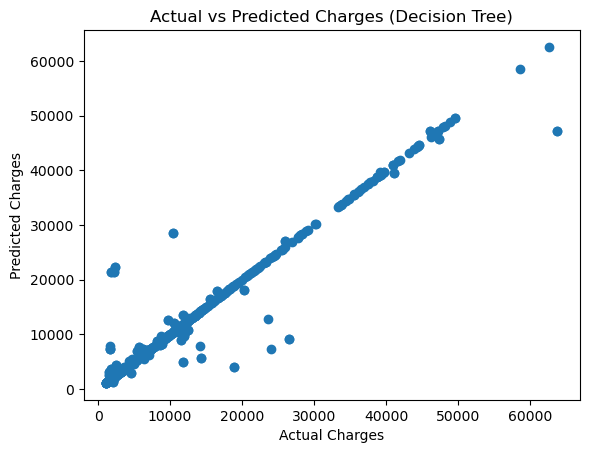

Fitting 5 folds for each of 12 candidates, totalling 60 fits


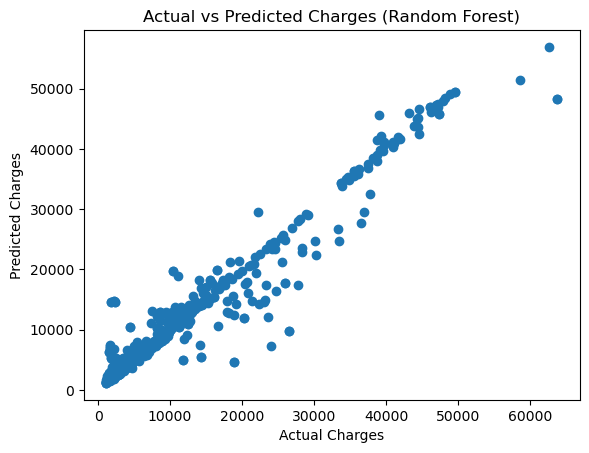

Fitting 5 folds for each of 9 candidates, totalling 45 fits


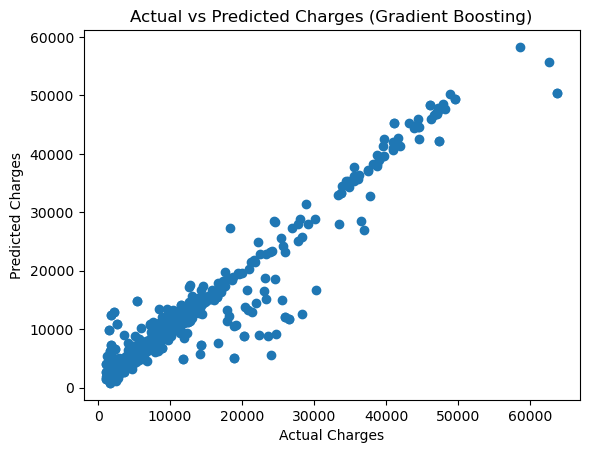

Fitting 5 folds for each of 9 candidates, totalling 45 fits


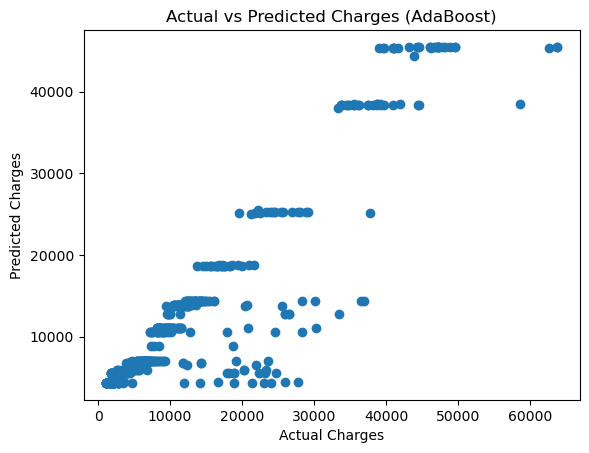

Fitting 5 folds for each of 6 candidates, totalling 30 fits


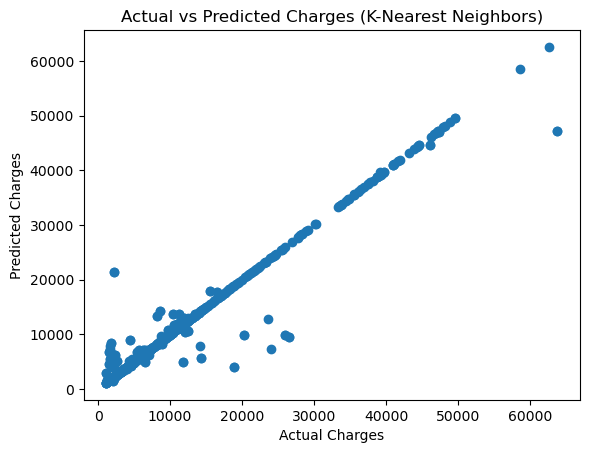

Fitting 5 folds for each of 18 candidates, totalling 90 fits


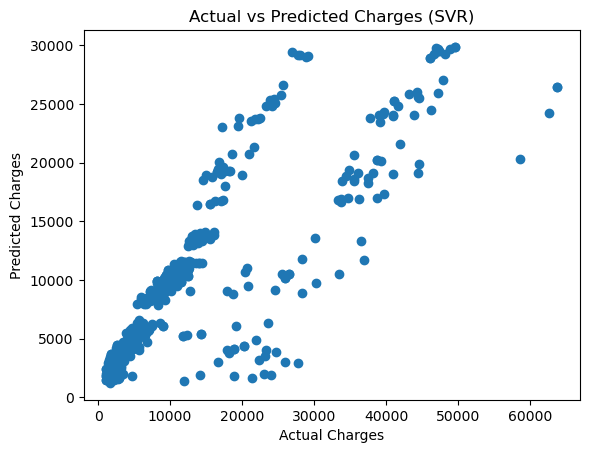

Fitting 5 folds for each of 9 candidates, totalling 45 fits


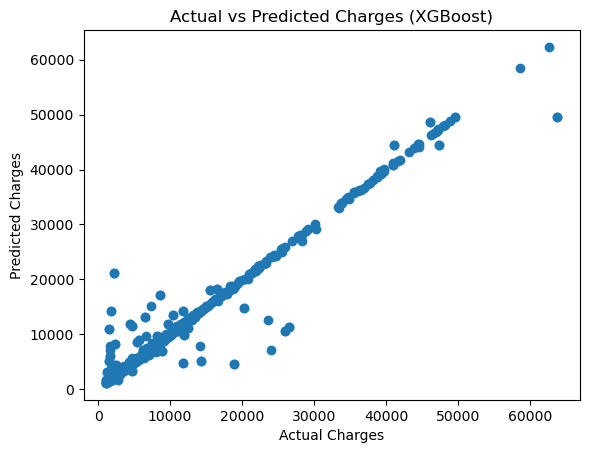

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 2217, number of used features: 4
[LightGBM] [Info] Start training from score 13371.074037
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 2217, number of used features: 4
[LightGBM] [Info] Start training from score 13371.074037


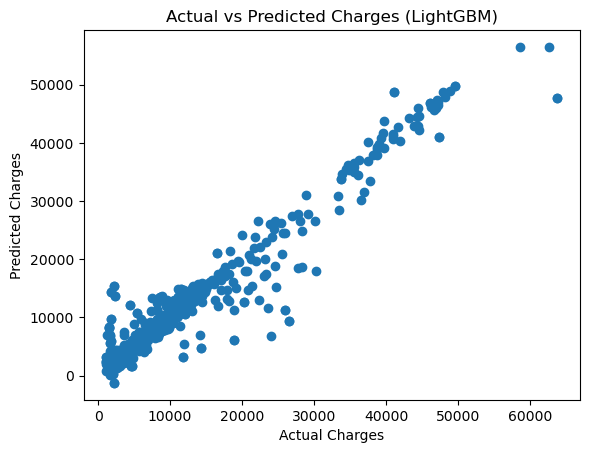

Fitting 5 folds for each of 9 candidates, totalling 45 fits


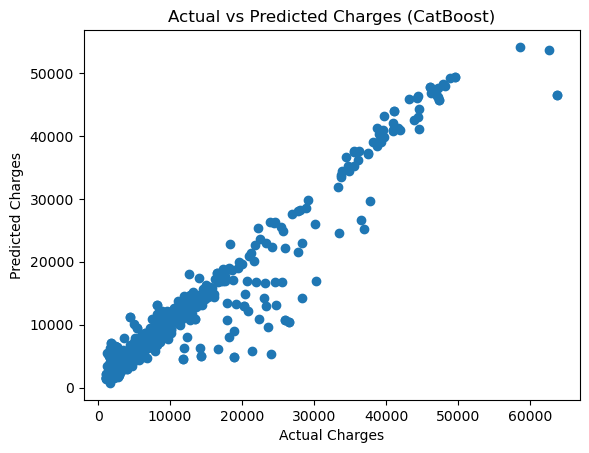

                  Model     MSE_train  R2_train  Adj_R2_train      MSE_test  \
9   K-Nearest Neighbors  5.018131e+05  0.996565      0.996559  7.900056e+06   
11              XGBoost  7.378484e+05  0.994949      0.994940  8.432487e+06   
5         Decision Tree  5.029020e+05  0.996557      0.996551  9.941118e+06   
6         Random Forest  1.747358e+06  0.988039      0.988017  1.043248e+07   
13             CatBoost  4.207339e+06  0.971199      0.971147  1.190370e+07   
12             LightGBM  2.614836e+06  0.982100      0.982068  1.208364e+07   
7     Gradient Boosting  4.297322e+06  0.970583      0.970530  1.212392e+07   
8              AdaBoost  2.016005e+07  0.861996      0.861746  2.484704e+07   
1      Lasso Regression  3.643668e+07  0.750575      0.750124  4.076028e+07   
0      Ridge Regression  3.643712e+07  0.750572      0.750121  4.076815e+07   
3        Bayesian Ridge  3.643817e+07  0.750565      0.750114  4.077557e+07   
2            ElasticNet  3.649373e+07  0.750185     

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df[['age', 'bmi','mean_charges_by_age_group_smoker', 'smoker_binary']]
y = df['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

# Define models with default parameters
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regressor': HuberRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

# Parameter grids for GridSearchCV
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'Bayesian Ridge': {'alpha_1': [1e-6, 1e-5, 1e-4], 'alpha_2': [1e-6, 1e-5, 1e-4],
                       'lambda_1': [1e-6, 1e-5, 1e-4], 'lambda_2': [1e-6, 1e-5, 1e-4]},
    'Huber Regressor': {'alpha': [0.0001, 0.001, 0.01]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [100, 200, 500], 'max_depth': [None, 10, 20, 30]},
    'Gradient Boosting': {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']},
    'SVR': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1.0, 10.0], 'epsilon': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.2]},
    'LightGBM': {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'iterations': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Train and evaluate each model
results = {'Model': [], 'MSE_train': [], 'R2_train': [], 'Adj_R2_train': [], 'MSE_test': [], 'R2_test': [], 'Adj_R2_test': []}

for model_name, model in models.items():
    # Perform GridSearchCV
    if model_name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
    
    # Train the best model
    best_model.fit(X_train_scaled, y_train)
    
    # Predict on training and test data
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)
    
    # Calculate metrics for training data
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train_scaled.shape[1] - 1)
    
    # Calculate metrics for test data
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)
    
    # Store results
    results['Model'].append(model_name)
    results['MSE_train'].append(mse_train)
    results['R2_train'].append(r2_train)
    results['Adj_R2_train'].append(adj_r2_train)
    results['MSE_test'].append(mse_test)
    results['R2_test'].append(r2_test)
    results['Adj_R2_test'].append(adj_r2_test)

     # Plot actual vs predicted charges
    plt.scatter(y_test, y_pred_test)
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title(f'Actual vs Predicted Charges ({model_name})')
    plt.show()
    

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Sort results by R2_test in descending order
results_df_sorted = results_df.sort_values(by='R2_test', ascending=False)

# Print the sorted results
print(results_df_sorted[['Model', 'MSE_train', 'R2_train', 'Adj_R2_train', 'MSE_test', 'R2_test', 'Adj_R2_test']])
